In [68]:
import pandas as pd 


# Carico il dataset
df = pd.read_csv("Dataset\Student_performance_data _.csv")

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lucab\AppData\Local\Temp\ipykernel_15672\2320224687.py:5: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Dataset\Student_performance_data _.csv")


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [69]:
df = df.drop(columns=["StudentID"])
df = df.drop(columns=["GradeClass"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


##### Applicazione K-Means

In [70]:

# Se necessario, normalizza i dati (importante per K-Means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [98]:
# Riduco la dimensionalità 
from sklearn.manifold import TSNE

# Applicare t-SNE per ridurre la dimensionalità a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
df_scaled_2d_tsne = tsne.fit_transform(df_scaled)

In [172]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista per memorizzare la somma delle distanze al quadrato (distorsione) per ciascun numero di cluster
wcss = []

# Iteriamo per un range di valori di k
for k in range(1, 41):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=30000, n_init=1000, random_state=42)
    kmeans.fit(df_scaled_2d_tsne)
    wcss.append(kmeans.inertia_)

# Grafico del metodo di Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), wcss, marker='o', linestyle='--')
plt.title('Metodo di Elbow')
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 41))
plt.grid(True)
plt.show()


KeyboardInterrupt: 

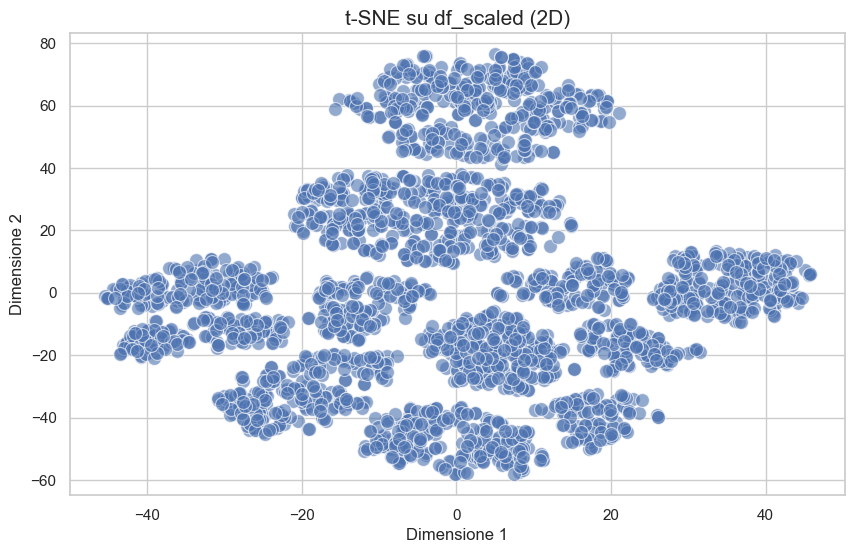

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo il grafico 2D del risultato t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_2d_tsne[:, 0], y=df_scaled_2d_tsne[:, 1], s=100, alpha=0.6, edgecolor="w")

# Aggiungiamo etichette e titolo
plt.title('t-SNE su df_scaled (2D)', fontsize=15)
plt.xlabel('Dimensione 1', fontsize=12)
plt.ylabel('Dimensione 2', fontsize=12)

# Mostriamo il grafico
plt.show()


In [174]:
from sklearn.cluster import KMeans

# Impostiamo il numero di cluster, ad esempio, 5 (puoi cambiarlo in base alla tua analisi)
kmeans = KMeans(n_clusters=11, init='k-means++', max_iter=30000, n_init=1000, random_state=42)

# Fitting del modello
kmeans.fit(df_scaled_2d_tsne)

# Otteniamo i cluster assegnati a ciascun dato
df['Cluster'] = kmeans.labels_
#df.head()

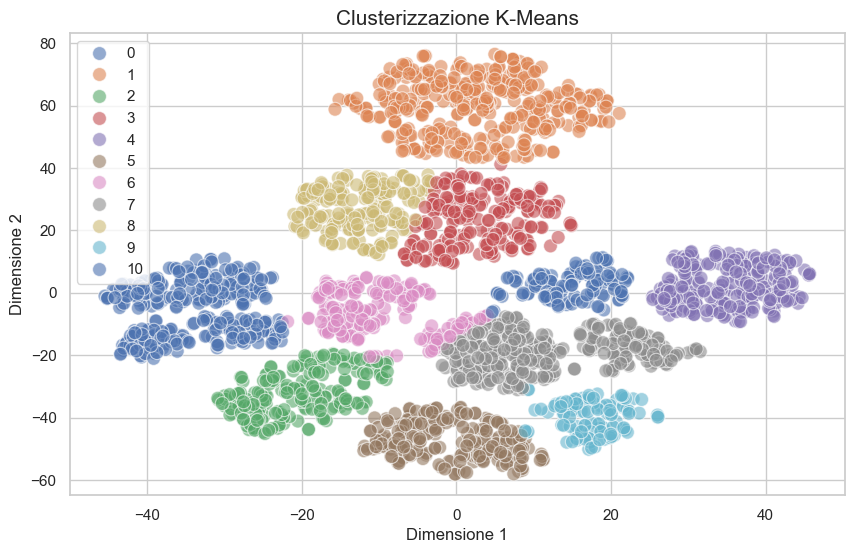

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np


# Creiamo una palette di colori per i cluster
sns.set(style="whitegrid")
palette = sns.color_palette("deep", n_colors=len(np.unique(kmeans.labels_)))

# Impostiamo il grafico a dispersione (scatter plot)
plt.figure(figsize=(10, 6))

# Mostriamo i dati con i cluster
sns.scatterplot(x=df_scaled_2d_tsne[:, 0], y=df_scaled_2d_tsne[:, 1], hue=df['Cluster'], palette=palette, s=100, alpha=0.6, edgecolor="w", legend="full")

# Ora, ridurre la perplexity per i centroidi (per esempio, settiamo la perplexity a 5)
#tsne_centroids = TSNE(n_components=2, random_state=42, perplexity=2)
#centroids_2d_tsne = tsne_centroids.fit_transform(kmeans.cluster_centers_)

# Mostriamo i centroidi
#plt.scatter(centroids_2d_tsne[:, 0], centroids_2d_tsne[:, 1], c='red', s=200, marker='X', label='Centroidi')

# Aggiungiamo etichette al grafico
plt.title('Clusterizzazione K-Means', fontsize=15)
plt.xlabel('Dimensione 1', fontsize=12)
plt.ylabel('Dimensione 2', fontsize=12)
plt.legend()

# Mostriamo il grafico
plt.show()


#### Calcolo Silhouette K-Means

Punteggio medio silhouette: 0.45


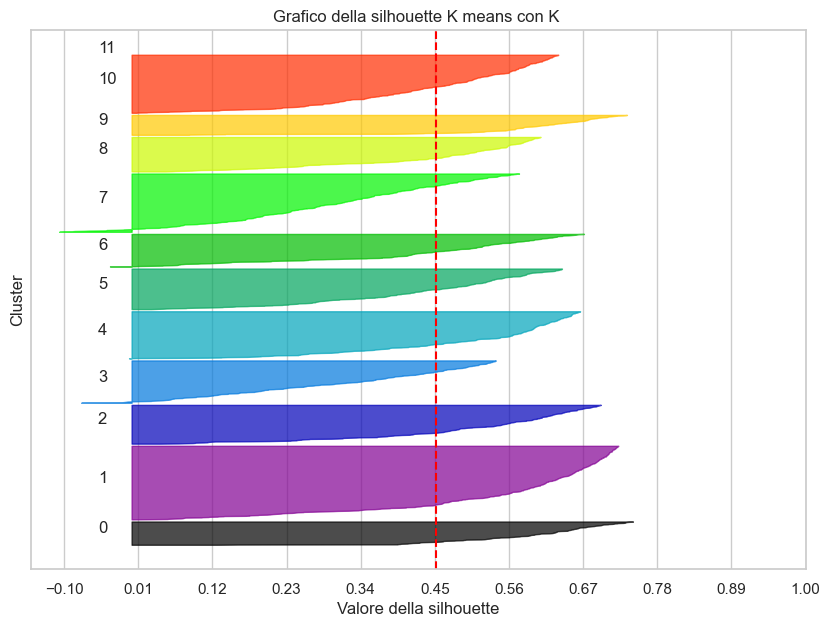

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcolo del punteggio della silhouette
silhouette_avg = silhouette_score(df_scaled_2d_tsne, df['Cluster'])
print(f'Punteggio medio silhouette: {silhouette_avg:.2f}')

# Calcolo della silhouette per ciascun punto
sample_silhouette_values = silhouette_samples(df_scaled_2d_tsne, df['Cluster'])

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
y_lower = 10  # Spaziatura iniziale tra i cluster

for i in range(12):  # Assumendo 12 cluster
    # Raccolta dei valori di silhouette per il cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 12)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etichetta per ciascun cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 per spaziatura tra i plot

ax.set_title("Grafico della silhouette K means con K ")
ax.set_xlabel("Valore della silhouette")
ax.set_ylabel("Cluster")

# Tracciare la linea media della silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Rimozione delle etichette sull'asse Y
ax.set_xticks(np.linspace(-0.1, 1.0, 11))
plt.show()


##### Applicazione DB-Scan

In [101]:
import pandas as pd 
df = pd.read_csv("Dataset\Student_performance_data _.csv")
df.head()
len(df)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lucab\AppData\Local\Temp\ipykernel_15672\3050211818.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Dataset\Student_performance_data _.csv")


2392

In [102]:
df = df.drop(columns=["StudentID"])
df = df.drop(columns=["GradeClass"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Valore medio della densità (con raggio eps=5): 1164.7959866220735


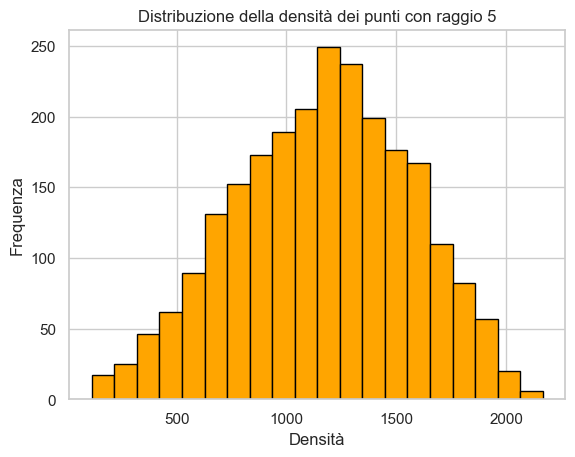

In [121]:
from sklearn.metrics.pairwise import euclidean_distances

# Imposta il valore di eps
eps = 5  # Raggio di distanza

# Calcolare la matrice delle distanze Euclidee
dist_matrix = euclidean_distances(df_scaled)

# Contare quanti punti sono all'interno del raggio eps per ciascun punto
densities = np.sum(dist_matrix <= eps, axis=1)

# Aggiungere le densità al dataframe
df_info = pd.DataFrame(columns=['density_eps'])
df_info['density_eps'] = densities

# Calcolare la densità media
average_density_eps = np.mean(densities)

# Visualizzare il valore medio della densità
print(f'Valore medio della densità (con raggio eps={eps}): {average_density_eps}')

# Visualizzare anche la distribuzione delle densità
plt.hist(densities, bins=20, color='orange', edgecolor='black')
plt.title(f'Distribuzione della densità dei punti con raggio {eps}')
plt.xlabel('Densità')
plt.ylabel('Frequenza')
plt.show()


In [125]:
# Riduco la dimensionalità 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
df_scaled_tsne = tsne.fit_transform(df_scaled)

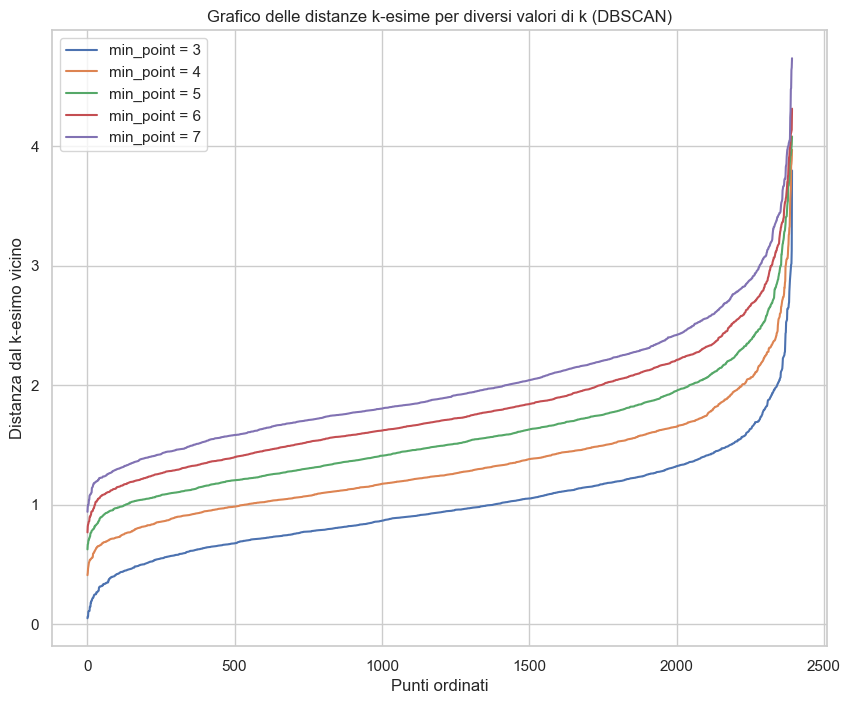

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assumiamo che df_scaled_tsne sia già un array numpy
X = df_scaled_tsne  # X è il tuo array numpy di dati scalati e ridotti tramite t-SNE

# Lista di k per cui calcolare il grafico
k_values = [3, 4, 5, 6, 7]

plt.figure(figsize=(10, 8))

# Iterare su diversi valori di k e tracciare il grafico per ciascuno
for k in k_values:
    # Calcolare la matrice delle distanze dei vicini
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    
    # Calcolare le distanze dei vicini
    distances, indices = neighbors.kneighbors(X)
    
    # Ordinare le distanze del k-esimo vicino (distances[:, -1] è la distanza dal k-esimo vicino)
    distances = np.sort(distances[:, -1], axis=0)
    
    # Tracciare il grafico per il valore di k corrente
    plt.plot(np.arange(1, len(distances) + 1), distances, label=f'min_point = {k}')

# Aggiungere il titolo e le etichette
plt.title('Grafico delle distanze k-esime per diversi valori di k (DBSCAN)')
plt.xlabel('Punti ordinati')
plt.ylabel('Distanza dal k-esimo vicino')
plt.legend()
plt.grid(True)

# Visualizzare il grafico
plt.show()


In [169]:
# Addestriamo il modello DBSCAN con l'eps trovato
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(df_scaled_tsne)


DBSCAN(eps=3)

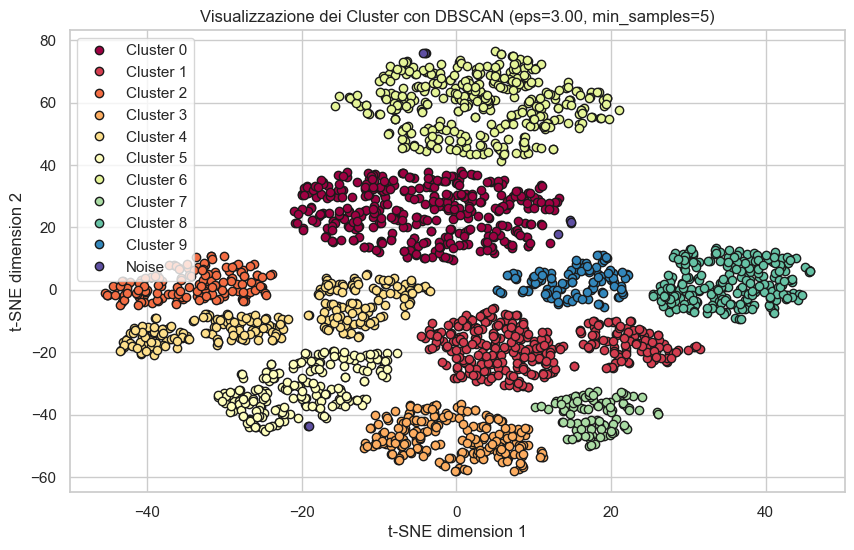

In [170]:
# Otteniamo i cluster dai risultati di DBSCAN
labels = db.labels_

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))

# Tracciamo ogni punto con il colore corrispondente al suo cluster
# I punti etichettati come -1 sono considerati "rumore" da DBSCAN
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    # Visualizza solo i punti che appartengono a un cluster
    plt.plot(df_scaled_tsne[class_member_mask, 0], df_scaled_tsne[class_member_mask, 1], 
             'o', markerfacecolor=col, markeredgecolor='k', markersize=6, label=f'Cluster {k}' if k != -1 else 'Noise')

# Aggiungi etichette, titolo e legenda
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title(f'Visualizzazione dei Cluster con DBSCAN (eps={eps:.2f}, min_samples={min_samples})')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

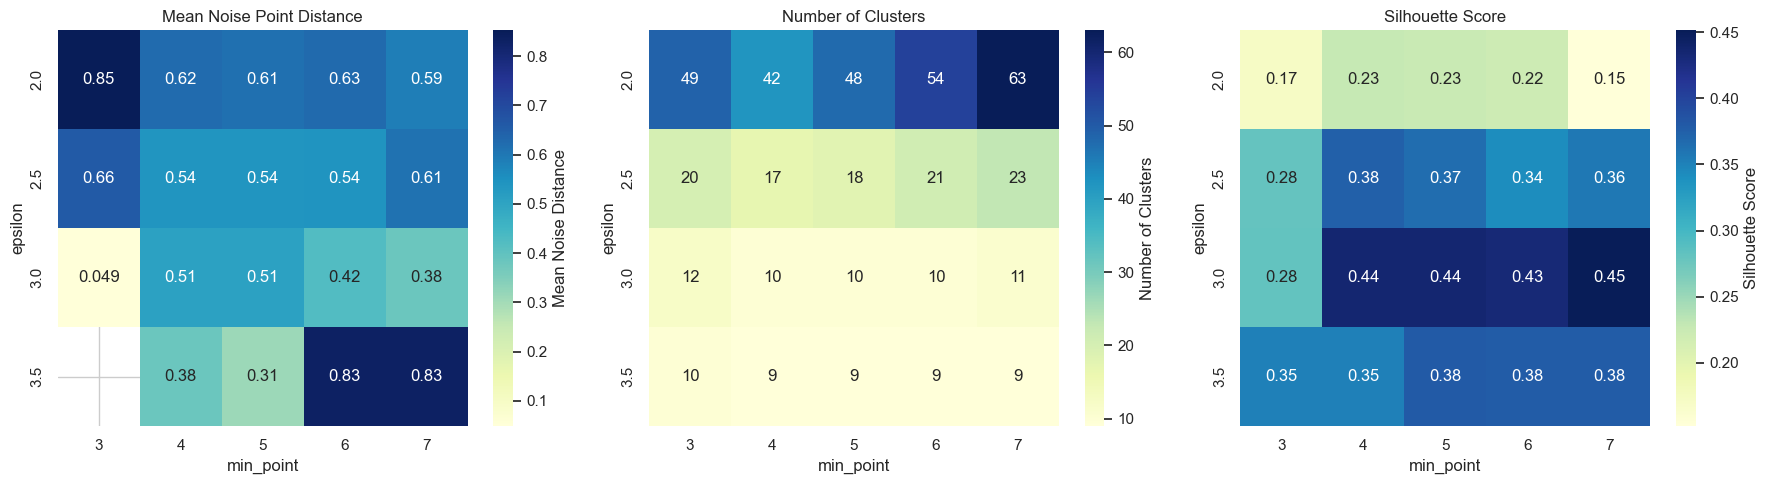

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Lista dei min_point da analizzare
min_points = [3,4,5,6,7]

# Intervallo di valori per epsilon da testare
eps_values = [2,2.5,3,3.5]

# Dataframe dove memorizziamo i risultati
results = []

# Calcolare le metriche per ciascun valore di min_point ed epsilon
for min_pt in min_points:
    for eps in eps_values:
        # DBSCAN con i parametri min_samples e epsilon
        db = DBSCAN(eps=eps, min_samples=min_pt, p=1)
        clusters = db.fit_predict(df_scaled_tsne)

        # Numero di cluster
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Ignorando i punti rumorosi
        
        # Identificare i punti rumorosi (-1 indica punti rumorosi in DBSCAN)
        noise_points = df_scaled_tsne[clusters == -1]
        
        # Calcolare la distanza media dei punti rumorosi
        if len(noise_points) > 0:
            nbrs = NearestNeighbors(n_neighbors=2).fit(df_scaled_tsne)
            distances, indices = nbrs.kneighbors(noise_points)
            mean_noise_distance = np.mean(distances[:, 1])  # Distanza media del secondo vicino
        else:
            mean_noise_distance = np.nan  # Nessun punto rumoroso
        
        # Calcolare il silhouette score (solo se ci sono cluster)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(df_scaled_tsne, clusters)
        else:
            silhouette_avg = np.nan  # Se c'è un solo cluster, il silhouette score non è definito
        
        # Memorizzare i risultati
        results.append({
            'min_point': min_pt,
            'epsilon': eps,
            'mean_noise_distance': mean_noise_distance,
            'num_clusters': num_clusters,
            'silhouette': silhouette_avg
        })

# Creare un DataFrame dei risultati
results_df = pd.DataFrame(results)
# Creare pivot tables per visualizzare le mappe di calore
# Impostare epsilon come indice e min_point come colonne

# Mappa di calore per la distanza media dei punti rumorosi
pivot_noise_distance = results_df.pivot(index='epsilon', columns='min_point', values='mean_noise_distance')

# Mappa di calore per il numero di cluster
pivot_num_clusters = results_df.pivot(index='epsilon', columns='min_point', values='num_clusters')

# Mappa di calore per il silhouette score
pivot_silhouette = results_df.pivot(index='epsilon', columns='min_point', values='silhouette')

# Visualizzare le mappe di calore
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mappa di calore per la distanza media dei punti rumorosi
sns.heatmap(pivot_noise_distance, annot=True, cmap='YlGnBu', ax=axes[0], cbar_kws={'label': 'Mean Noise Distance'})
axes[0].set_title('Mean Noise Point Distance')

# Mappa di calore per il numero di cluster
sns.heatmap(pivot_num_clusters, annot=True, cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Number of Clusters'})
axes[1].set_title('Number of Clusters')

# Mappa di calore per il silhouette score
sns.heatmap(pivot_silhouette, annot=True, cmap='YlGnBu', ax=axes[2], cbar_kws={'label': 'Silhouette Score'})
axes[2].set_title('Silhouette Score')

# Visualizzare i grafici
plt.tight_layout()
plt.show()


Punteggio medio silhouette: 0.44


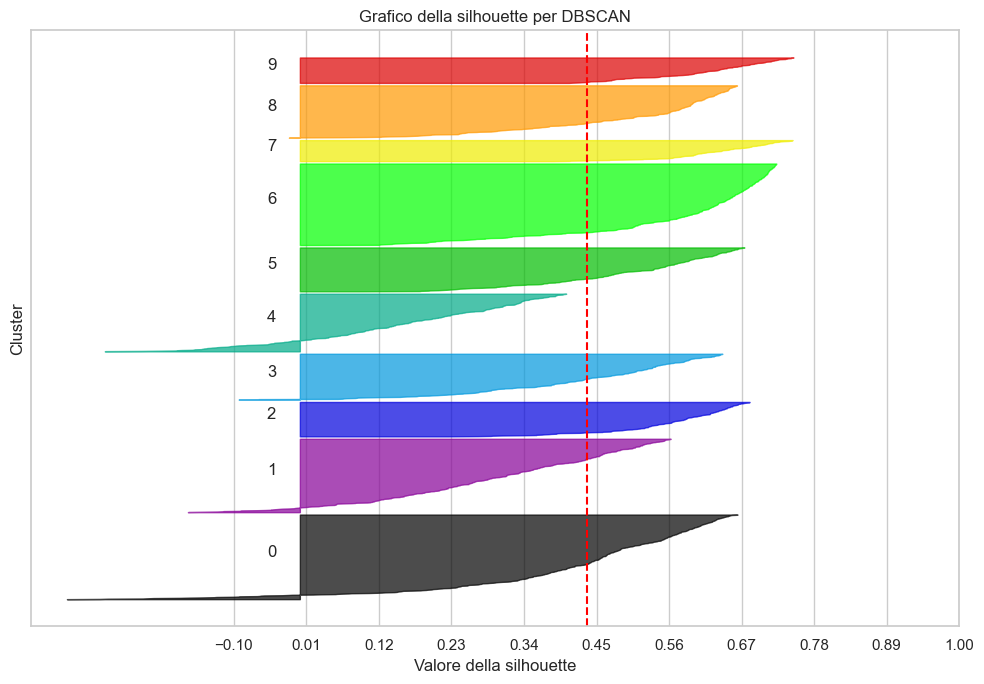

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcoliamo i valori di silhouette per ogni punto
sample_silhouette_values = silhouette_samples(df_scaled_tsne, db.labels_)

# Calcoliamo il punteggio medio della silhouette
silhouette_avg = silhouette_score(df_scaled_tsne, db.labels_)
print(f'Punteggio medio silhouette: {silhouette_avg:.2f}')

# Crea il grafico della silhouette
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

y_lower = 10  # Posizione iniziale per i cluster

# Prendiamo i cluster unici (ignoriamo il cluster -1 che rappresenta il rumore)
unique_labels = np.unique(db.labels_)
unique_labels = unique_labels[unique_labels != -1]  # Escludiamo il rumore (-1)

for i in unique_labels:
    # Ottieni i valori di silhouette per i punti appartenenti al cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[db.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Assegna un colore per ciascun cluster
    color = plt.cm.nipy_spectral(float(i) / len(unique_labels))
    
    # Traccia la zona della silhouette per il cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Etichetta per il cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # Aggiungiamo uno spazio tra i cluster

# Linea rossa per il punteggio medio della silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Etichette e titolo
ax.set_title("Grafico della silhouette per DBSCAN")
ax.set_xlabel("Valore della silhouette")
ax.set_ylabel("Cluster")

# Rimuoviamo le etichette sull'asse Y
ax.set_yticks([])

# Impostiamo i valori per l'asse X
ax.set_xticks(np.linspace(-0.1, 1.0, 11))

# Mostriamo il grafico
plt.tight_layout()
plt.show()
